# Interaction with sectionproperties

We can use any [geometry](https://sectionproperties.readthedocs.io/en/stable/user_guide/geometry.html) or [CompoundGeometry](https://sectionproperties.readthedocs.io/en/stable/user_guide/geometry.html) object in the ``sectionproperties`` package to construct a section.

In [21]:
import numpy as np
import openseespy.opensees as ops
import opstool as opst
import matplotlib.pyplot as plt

## Using the Section Library

[Section Library](https://sectionproperties.readthedocs.io/en/stable/examples/geometry/section_library.html)

### Circular Section

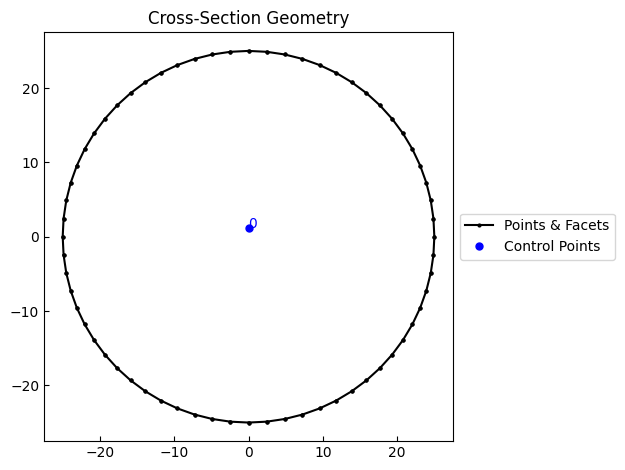

<Axes: title={'center': 'Cross-Section Geometry'}>

In [22]:
from sectionproperties.analysis import Section
from sectionproperties.pre.library import circular_section

geom = circular_section(d=50, n=64)
geom.plot_geometry()

OPSTOOL :: The section My Section has been successfully meshed!

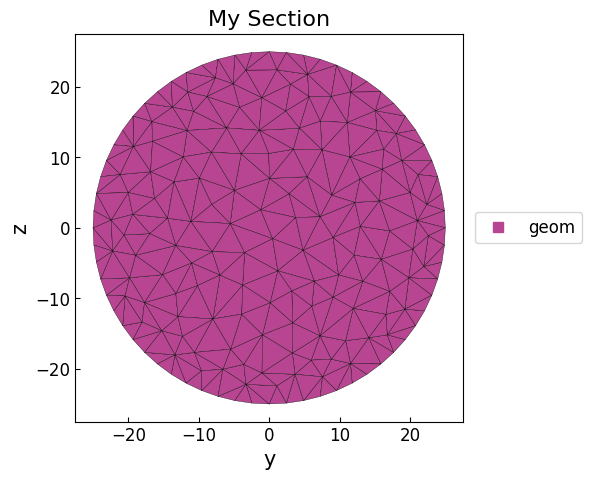

In [23]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"geom": geom})
SEC_MESH.set_mesh_size(mesh_size=5)
SEC_MESH.set_ops_mat_tag(dict(geom=1))
SEC_MESH.mesh()
SEC_MESH.view()
plt.show()

### Tapered Flange Channel Section

OPSTOOL :: The section My Section has been successfully meshed!

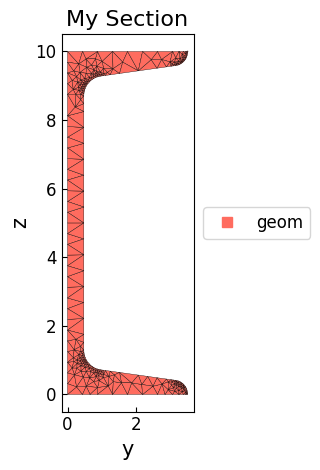

In [24]:
from sectionproperties.pre.library import tapered_flange_channel

geom = tapered_flange_channel(
    d=10,
    b=3.5,
    t_f=0.575,
    t_w=0.475,
    r_r=0.575,
    r_f=0.4,
    alpha=8,
    n_r=16,
)

fig, ax = plt.subplots()
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"geom": geom})
SEC_MESH.set_mesh_size(mesh_size=0.5)
SEC_MESH.set_ops_mat_tag(dict(geom=1))
SEC_MESH.mesh()
SEC_MESH.view(ax=ax)
ax.set_aspect('equal')
plt.show()

### Rectangular Concrete Section

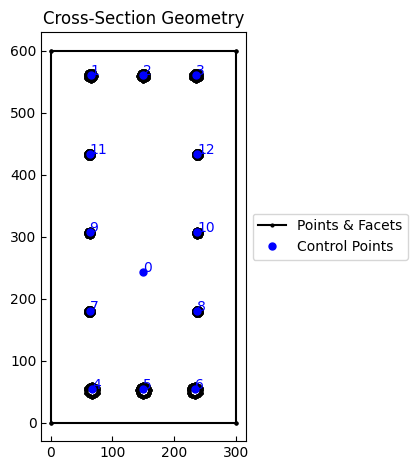

<Axes: title={'center': 'Cross-Section Geometry'}>

In [25]:
from sectionproperties.pre import Material
from sectionproperties.pre.library import concrete_rectangular_section

# define the concrete material
concrete = Material(
    name="Concrete",
    elastic_modulus=30.1e3,
    poissons_ratio=0.2,
    density=2.4e-6,
    yield_strength=32,
    color="lightgrey",
)

# define the steel material
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=7.85e-6,
    color="grey",
)

# create the geometry
geom = concrete_rectangular_section(
    d=600,
    b=300,
    dia_top=16,
    area_top=200,
    n_top=3,
    c_top=32,
    dia_bot=20,
    area_bot=310,
    n_bot=3,
    c_bot=42,
    dia_side=12,
    area_side=110,
    n_side=3,
    c_side=57,
    n_circle=16,
    conc_mat=concrete,
    steel_mat=steel,
)
geom.plot_geometry()

In [26]:
print(len(geom.geoms))

13


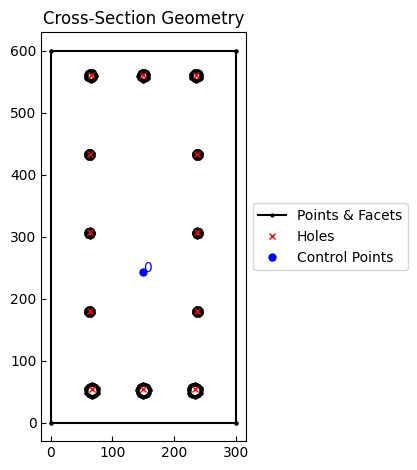

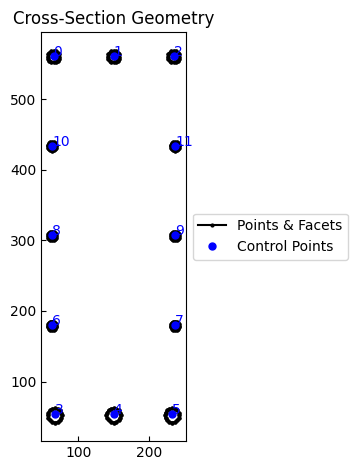

<Axes: title={'center': 'Cross-Section Geometry'}>

In [27]:
concrete = geom.geoms[0]
steel = geom.geoms[1:]
steel = sum(steel[1:], steel[0])
concrete.plot_geometry()
steel.plot_geometry()

OPSTOOL :: The section My Section has been successfully meshed!

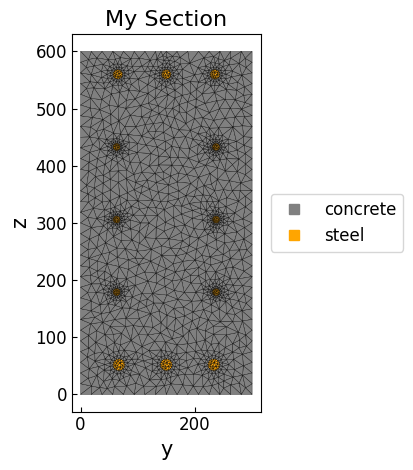

In [28]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"concrete": concrete, "steel": steel})
SEC_MESH.set_mesh_size(mesh_size={"concrete": 20, "steel": 10})
SEC_MESH.set_ops_mat_tag({"concrete": 1, "steel": 2})
SEC_MESH.set_mesh_color({"concrete": "gray", "steel": "orange"})
SEC_MESH.mesh()

fig, ax = plt.subplots()
SEC_MESH.view(ax=ax)
ax.set_aspect('equal')
plt.show()


In [29]:
SEC_MESH.get_frame_props(Eref=30.1e3, display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 1.924E+05              │ Cross-sectional area                   │
│ centroid  │ (1.500E+02, 2.979E+02) │ Elastic centroid                       │
│ Iy        │ 5.991E+09              │ Moment of inertia y-axis               │
│ Iz        │ 1.419E+09              │ Moment of inertia z-axis               │
│ Iyz       │ 3.438E-01              │ Product of inertia                     │
│ Wyt       │ 1.983E+07              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 2.011E+07              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 9.459E+06              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 9.459E+06              │ Section moduli of bottom fibres z-axis │
│ J         │ 3.762E+09              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

{'A': 192361.49501661223,
 'centroid': (149.99999999999966, 297.92601657904174),
 'Iy': 5991381399.499234,
 'Iz': 1418834866.2194405,
 'Iyz': 0.34375,
 'Wyt': 19834152.321386393,
 'Wyb': 20110299.42364795,
 'Wzt': 9458899.108129581,
 'Wzb': 9458899.108129622,
 'J': 3762045314.8805337,
 'phi': 0.0,
 'rho_rebar': 0.0}

### super_t_girder_section

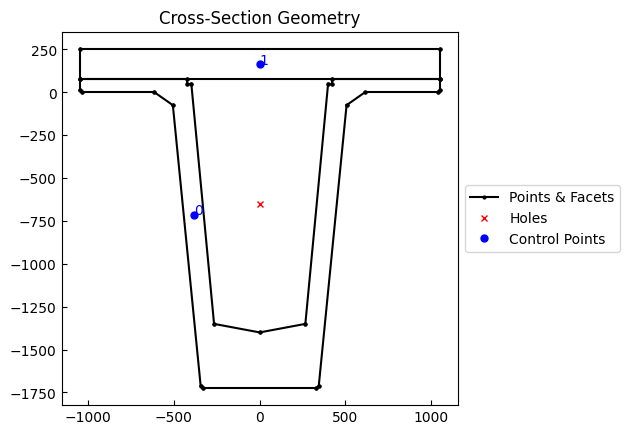

<Axes: title={'center': 'Cross-Section Geometry'}>

In [30]:
from sectionproperties.pre.library import super_t_girder_section
from sectionproperties.pre.library import rectangular_section

super_t = super_t_girder_section(girder_type=5, w=2100)
slab = rectangular_section(d=180, b=2100).shift_section(x_offset=-1050,
                                                        y_offset=75)
(super_t + slab).plot_geometry()

OPSTOOL :: The section My Section has been successfully meshed!

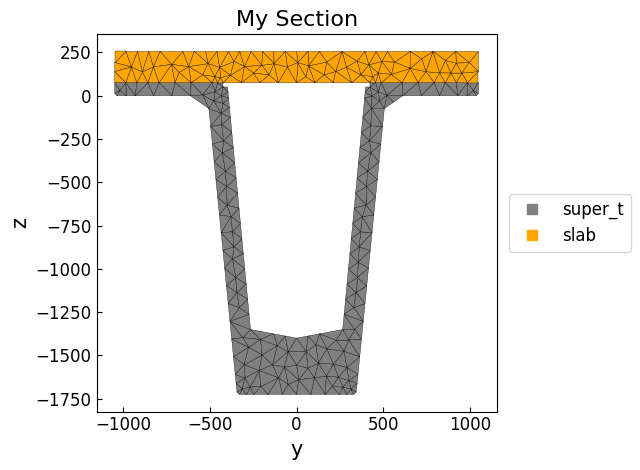

In [31]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"super_t": super_t, "slab": slab})
SEC_MESH.set_mesh_size(mesh_size={"super_t": 100, "slab": 100})
SEC_MESH.set_ops_mat_tag({"super_t": 1, "slab": 1})
SEC_MESH.set_mesh_color({"super_t": "gray", "slab": "orange"})
SEC_MESH.mesh()

fig, ax = plt.subplots()
SEC_MESH.view(ax=ax)
ax.set_aspect('equal')
plt.show()

## Geometric operations

[Manipulating Geometry Objects](https://sectionproperties.readthedocs.io/en/stable/user_guide/geometry.html#manipulating-geometry-objects)

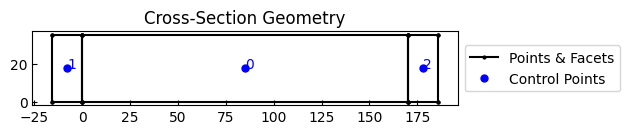

<Axes: title={'center': 'Cross-Section Geometry'}>

In [32]:
from sectionproperties.pre.library import rectangular_section
from sectionproperties.pre import Material

# create a timber material
timber = Material(
    name="Timber",
    elastic_modulus=8e3,
    poissons_ratio=0.35,
    density=6.5e-7,
    yield_strength=20,
    color="burlywood",
)

steel = Material(
    name="Steel",
    elastic_modulus=200e3,  # N/mm^2 (MPa)
    poissons_ratio=0.3,  # unitless
    density=7.85e-6,  # kg/mm^3
    yield_strength=500,  # N/mm^2 (MPa)
    color="grey",
)

# create individual geometries with material properties applied
beam = rectangular_section(d=35, b=170, material=timber)
plate1 = rectangular_section(d=35, b=16, material=steel)
plate2 = rectangular_section(d=35, b=16, material=steel)
plate_left = plate1.align_to(other=beam, on="left")
plate_right = plate2.align_to(other=beam, on="right")
plate = plate_left + plate_right

# combine geometries, maintaining assigned materials
(beam + plate).plot_geometry()

OPSTOOL :: The section My Section has been successfully meshed!

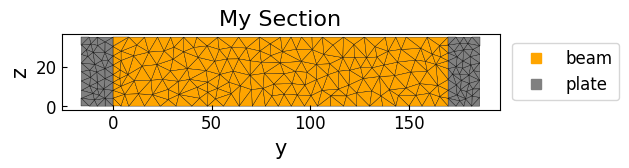

In [33]:
SEC_MESH = opst.pre.section.FiberSecMesh()
SEC_MESH.add_patch_group({"beam": beam, "plate": plate})
SEC_MESH.set_mesh_size({"beam": 8, "plate": 5})
SEC_MESH.set_ops_mat_tag({"beam": 1, "plate": 111})
SEC_MESH.set_mesh_color({"beam": "orange", "plate": "gray"})
SEC_MESH.mesh()

fig, ax = plt.subplots()
SEC_MESH.view(ax=ax)
ax.set_aspect('equal')
plt.show()

In [34]:
frame_props = SEC_MESH.get_frame_props(Eref=8e3, display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 3.395E+04              │ Cross-sectional area                   │
│ centroid  │ (8.500E+01, 1.750E+01) │ Elastic centroid                       │
│ Iy        │ 3.466E+06              │ Moment of inertia y-axis               │
│ Iz        │ 2.571E+08              │ Moment of inertia z-axis               │
│ Iyz       │ -6.104E-04             │ Product of inertia                     │
│ Wyt       │ 1.980E+05              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.980E+05              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 2.546E+06              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 2.546E+06              │ Section moduli of bottom fibres z-axis │
│ J         │ 4.608E+06              │ Torsion constant                       │
│ phi       │ -9.000E+01             │ Principal axis angle                   │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

OPSTOOL :: The section My Section has been successfully remeshed!

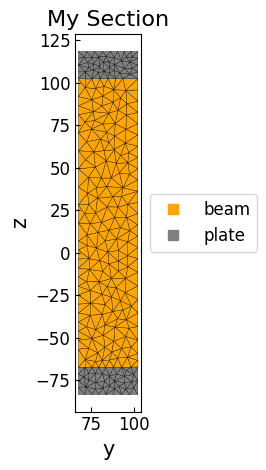

In [35]:
SEC_MESH.rotate(theta=90, remesh=True)

fig, ax = plt.subplots()
SEC_MESH.view(ax=ax)
ax.set_aspect('equal')
plt.show()

In [36]:
frame_props90 = SEC_MESH.get_frame_props(Eref=8e3, display_results=True)

                           Frame Section Properties                            
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 3.395E+04              │ Cross-sectional area                   │
│ centroid  │ (8.500E+01, 1.750E+01) │ Elastic centroid                       │
│ Iy        │ 2.571E+08              │ Moment of inertia y-axis               │
│ Iz        │ 3.466E+06              │ Moment of inertia z-axis               │
│ Iyz       │ -6.714E-04             │ Product of inertia                     │
│ Wyt       │ 2.546E+06              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 2.546E+06              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.980E+05              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.980E+05              │ Section moduli of bottom fibres z-axis │
│ J         │ 4.609E+06              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘